# Loan Prediction Problem 

#### In this model we try to predict a customer will get a loan or not based on the available data

#### Loan Status is the variable which we are going to predict

In [52]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

print("libraries Imported")


libraries Imported


#### Now we will read the train and load it in a dataframe

In [53]:
df=pd.read_csv('Loan_train.csv')

In [54]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [28]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Now, Lets look for co-relation in different variables

Here, we can see ApplicantIncome and LoanAmount have a good +ve co-relation</br>
Let's take a look at that

So, As we know it shows a +ve correlation

Now, lets check for missing values

In [29]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Seven Columns have missing values.

#### We will now try to remove the missing values

For loan amount as it is a int type data. we can replace the missing value with its mean

In [30]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [31]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

As we have majority of 'No' as value . So, we can replace the missing value with 'No'

In [33]:
df['Self_Employed'].fillna('No',inplace=True)

Now, Lets replace all other missing field with their modes

In [34]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [35]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now, Let's take a look at our data's characteristics

Text(0.5, 1.0, 'Histogram of ApllicantIncome')

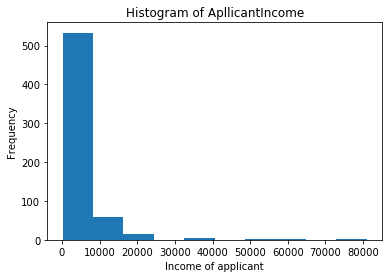

In [36]:
df['ApplicantIncome'].plot(kind='hist')
plt.xlabel('Income of applicant')
plt.title('Histogram of ApllicantIncome')

Text(0, 0.5, 'Income')

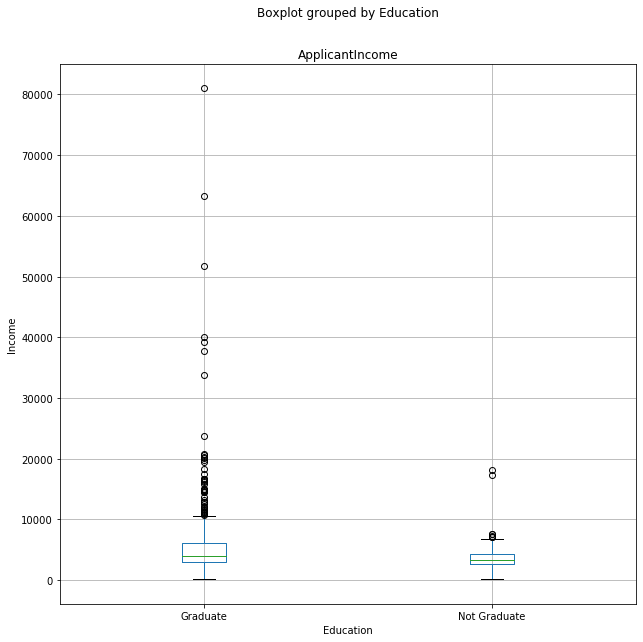

In [37]:
df.boxplot(column='ApplicantIncome', by = 'Education',figsize=(10,10))
plt.ylabel('Income')

Text(0.5, 1.0, 'Histogram of ApllicantIncome')

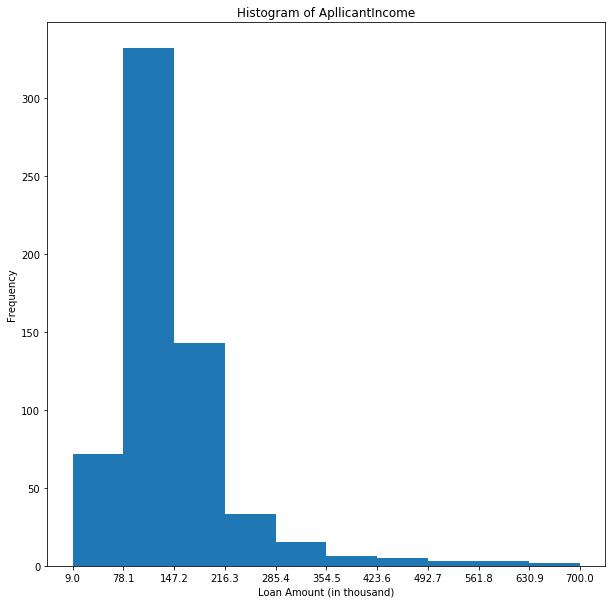

In [38]:
counts,binedges= np.histogram(df['LoanAmount'])
df['LoanAmount'].plot(kind='hist',xticks=binedges,figsize=(10,10))
plt.xlabel('Loan Amount (in thousand)')
plt.title('Histogram of ApllicantIncome')

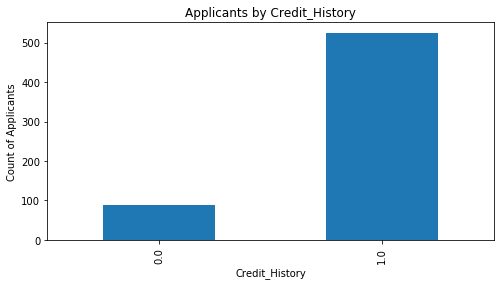

In [39]:
import matplotlib.pyplot as plt
temp1 = df['Credit_History'].value_counts(ascending=True)
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

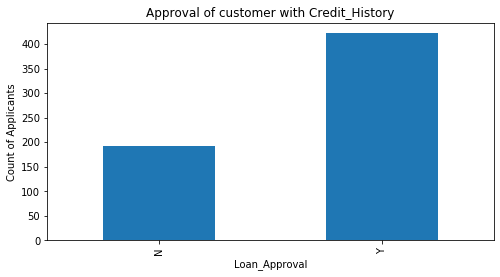

In [40]:
Credit_1=df[df['Credit_History']==1]
temp1 = df['Loan_Status'].value_counts(ascending=True)
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Loan_Approval')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Approval of customer with Credit_History")
temp1.plot(kind='bar')

In [41]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059383,0.011134
LoanAmount,0.565620,0.187828,1.000000,0.036475,-0.001431
Loan_Amount_Term,-0.046531,-0.059383,0.036475,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.001431,-0.004705,1.000000


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Relation between ApplicantIncome and LoanAmount')

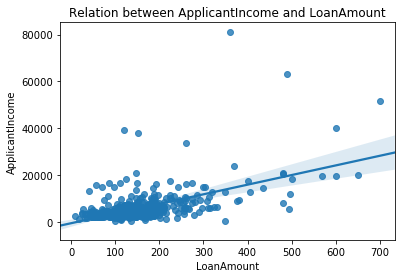

In [42]:
sns.regplot(y='ApplicantIncome',x='LoanAmount',data=df)
plt.title('Relation between ApplicantIncome and LoanAmount')


Text(0, 0.5, 'Income')

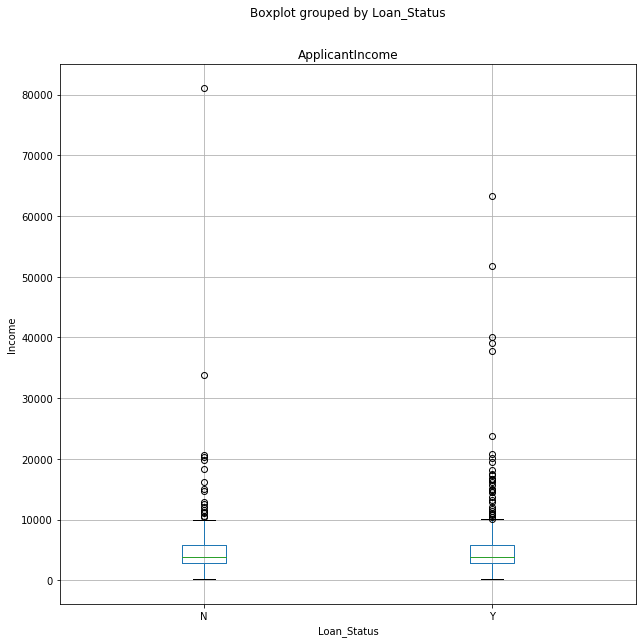

In [43]:
df.boxplot(column='ApplicantIncome', by = 'Loan_Status',figsize=(10,10))
plt.ylabel('Income')

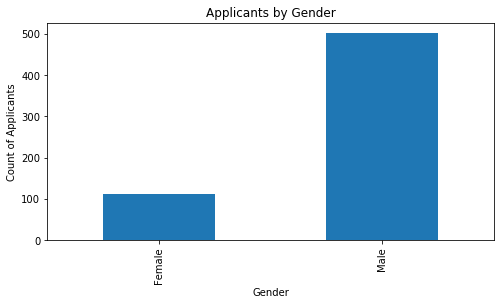

In [44]:
temp1 = df['Gender'].value_counts(ascending=True)
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Gender")
temp1.plot(kind='bar')

In [49]:
temp2=df[df['Gender']=='Female']
temp2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
29,LP001087,Female,No,2,Graduate,No,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
37,LP001112,Female,Yes,0,Graduate,No,3667,1459.0,144.0,360.0,1.0,Semiurban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,360.0,1.0,Urban,Y
48,LP001146,Female,Yes,0,Graduate,No,2645,3440.0,120.0,360.0,0.0,Urban,N


N    37
Y    75
Name: Loan_Status, dtype: int64

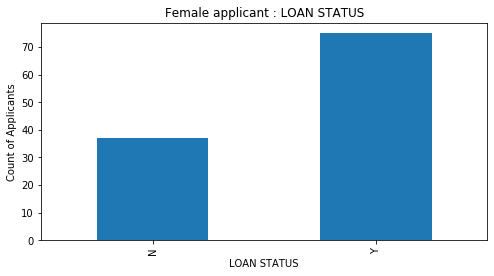

In [50]:
temp1 = temp2['Loan_Status'].value_counts(ascending=True)
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('LOAN STATUS')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Female applicant : LOAN STATUS")
temp1.plot(kind='bar')
temp1

N    155
Y    347
Name: Loan_Status, dtype: int64

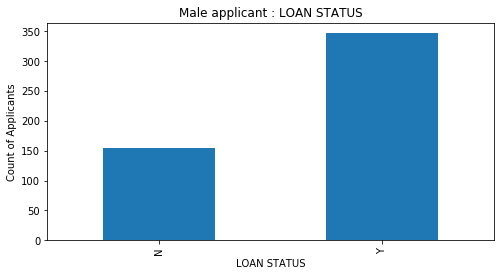

In [51]:
temp2=df[df['Gender']=='Male']
temp1 = temp2['Loan_Status'].value_counts(ascending=True)
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('LOAN STATUS')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Male applicant : LOAN STATUS")
temp1.plot(kind='bar')
temp1

Converting all the object type data into numeric type

In [22]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [23]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [24]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [25]:
X=np.asarray(df[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']])
y=np.asarray(df['Loan_Status'])
X[0:5]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.84900000e+03, 1.46412162e+02, 3.60000000e+02,
        1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.58300000e+03, 1.28000000e+02, 3.60000000e+02,
        1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 3.00000000e+03, 6.60000000e+01, 3.60000000e+02,
        1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 2.58300000e+03, 1.20000000e+02, 3.60000000e+02,
        1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.00000000e+03, 1.41000000e+02, 3.60000000e+02,
        1.00000000e+00]])

In [26]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.47234264, -1.37208932, -0.73780632, -0.52836225, -0.39260074,
         0.07299082,  0.        ,  0.2732313 ,  0.41173269],
       [ 0.47234264,  0.72881553,  0.25346957, -0.52836225, -0.39260074,
        -0.13441195, -0.21927331,  0.2732313 ,  0.41173269],
       [ 0.47234264,  0.72881553, -0.73780632, -0.52836225,  2.54711697,
        -0.39374734, -0.957641  ,  0.2732313 ,  0.41173269],
       [ 0.47234264,  0.72881553, -0.73780632,  1.89264089, -0.39260074,
        -0.46206247, -0.31454656,  0.2732313 ,  0.41173269],
       [ 0.47234264, -1.37208932, -0.73780632, -0.52836225, -0.39260074,
         0.09772844, -0.06445428,  0.2732313 ,  0.41173269]])

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (491, 9) (491,)
Test set: (123, 9) (123,)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1])

In [30]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.36514697, 0.63485303],
       [0.29926404, 0.70073596],
       [0.31268334, 0.68731666],
       [0.36201418, 0.63798582],
       [0.31293682, 0.68706318],
       [0.41939704, 0.58060296],
       [0.32713512, 0.67286488],
       [0.68434983, 0.31565017],
       [0.35919066, 0.64080934],
       [0.43851833, 0.56148167],
       [0.36547951, 0.63452049],
       [0.36525096, 0.63474904],
       [0.30738657, 0.69261343],
       [0.31054473, 0.68945527],
       [0.74134371, 0.25865629],
       [0.31252986, 0.68747014],
       [0.36754811, 0.63245189],
       [0.35289285, 0.64710715],
       [0.37428641, 0.62571359],
       [0.3491371 , 0.6508629 ],
       [0.74928557, 0.25071443],
       [0.31570829, 0.68429171],
       [0.28649991, 0.71350009],
       [0.30896319, 0.69103681],
       [0.7540716 , 0.2459284 ],
       [0.32385447, 0.67614553],
       [0.35666111, 0.64333889],
       [0.36086762, 0.63913238],
       [0.35456918, 0.64543082],
       [0.3173501 , 0.6826499 ],
       [0.

Now, Let's calculate the accuracy of the the prediction.</br>
And for that we use Jacard's Index

In [31]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.7886178861788617

If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.